In [22]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image 

# Paths to the dataset (Replace with your own paths when running the notebook)
# This is an example of the paths, you need to change them to your local paths where the datasets are stored
input_dir = '/Users/zhanglin/Documents/dku/2024-2025/session3/STATS 201/reflection/week2/mini/input_noise'  # Folder containing blurry images
target_dir = '/Users/zhanglin/Documents/dku/2024-2025/session3/STATS 201/reflection/week2/mini/target'      # Folder containing clean images

# Get the list of filenames in the dataset
input_files = os.listdir(input_dir)
target_files = os.listdir(target_dir)


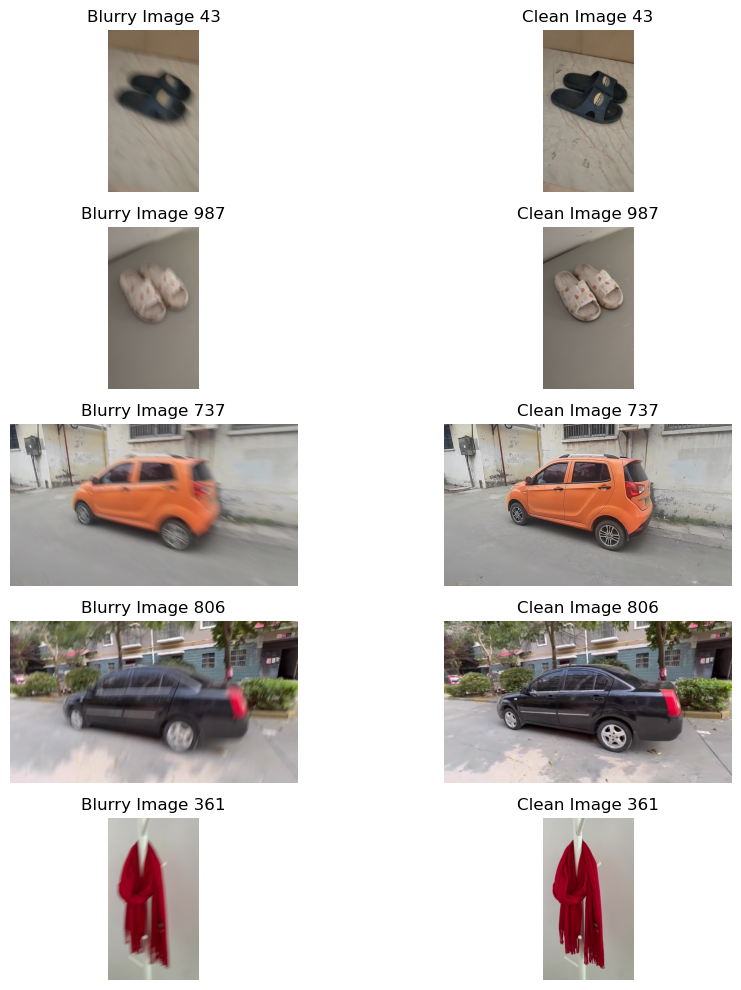

In [24]:
# Ensure the number of blurry and clean images match
assert len(input_files) == len(target_files), "Mismatch between blurry and clean images"

# Randomly select a few pairs of images to display
random_indices = random.sample(range(len(input_files)), 5)

# Display the blurry and clean images
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    # Load the images
    input_image = Image.open(os.path.join(input_dir, input_files[idx]))
    target_image = Image.open(os.path.join(target_dir, target_files[idx]))

    # Display the images
    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(input_image)
    plt.title(f'Blurry Image {idx+1}')
    plt.axis('off')

    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(target_image)
    plt.title(f'Clean Image {idx+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


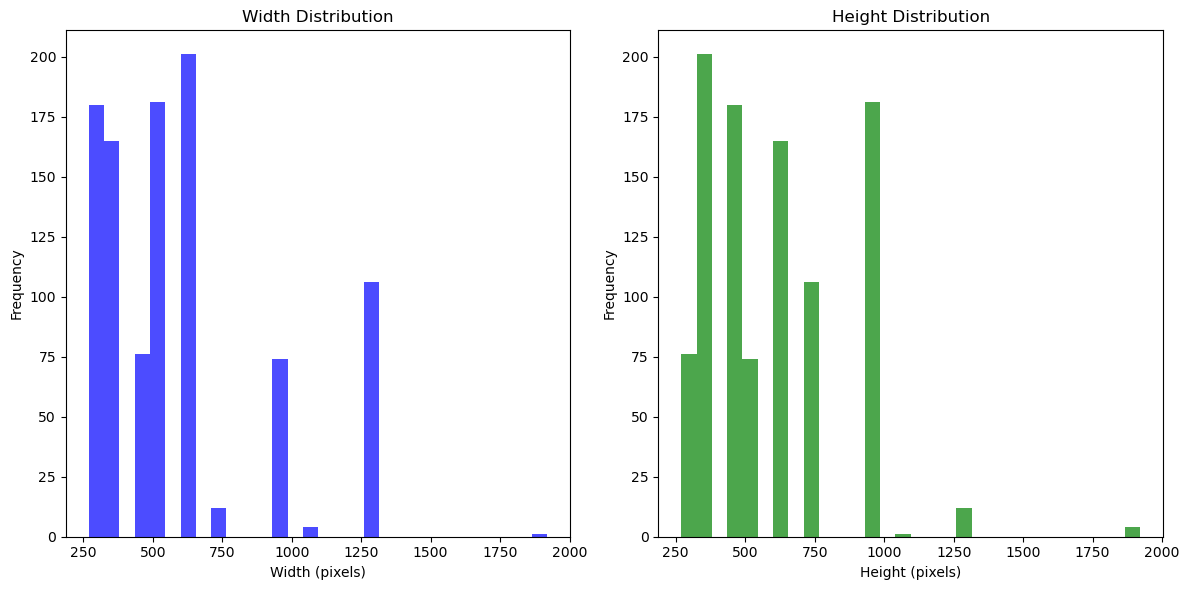

In [26]:
# Image size distribution
# Get the size of each image (width and height)
input_sizes = [Image.open(os.path.join(input_dir, f)).size for f in input_files]
widths, heights = zip(*input_sizes)  # Unpack the width and height

# Plot histograms for image width and height distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='blue', alpha=0.7)
plt.title("Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='green', alpha=0.7)
plt.title("Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

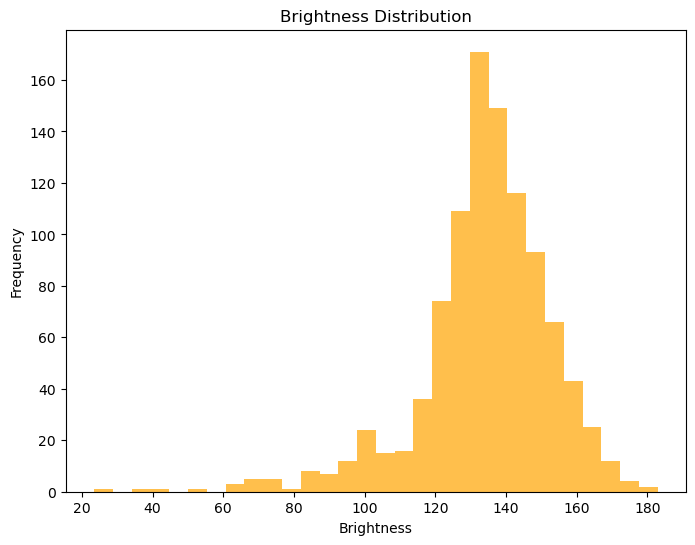

In [28]:
# Image brightness distribution
# Define a function to calculate the average brightness of an image
def calculate_brightness(image):
    image_array = np.array(image)
    # Calculate brightness using weighted average of RGB channels
    brightness = 0.299 * image_array[..., 0] + 0.587 * image_array[..., 1] + 0.114 * image_array[..., 2]
    return np.mean(brightness)

# Get the brightness value for each image
brightness_values = []
for filename in input_files:
    image = Image.open(os.path.join(input_dir, filename))
    brightness = calculate_brightness(image)
    brightness_values.append(brightness)

# Plot the histogram for image brightness distribution
plt.figure(figsize=(8, 6))
plt.hist(brightness_values, bins=30, color='orange', alpha=0.7)
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()